# Github folder to DataverseNL

This notebook helps the user to transfer a folder in a public Github repository to dataverseNL without downloading the contents of the folder.

#Requistites
- Public Github project url
- Having a dataset entry created in the DataverseNL platform with a DOI
- API token


# Step 1 - Getting Familiar with Colab Notebooks
Colab Notebooks allows you to write and execute Python in your browser, without any installation requirement, computation free of charge, and you can easily share. It works just like Google Docs

Colab Notebooks contain code cells. Each code cell contains Python code. Like the following

Hover the cell below and click the play ▶️ button

In [ ]:
hello = 'Greetings from Python'

print(hello)

Greetings from Python


That's it! This is how you "run" Python code inside a Colab Notebook cell.

2. **IMPORTANT**: Before we start, please note that this is a public notebook which means that if you put sensitive information such as credentials or tokens in this very notebook will be visible to everyone. So, please create a copy of this notebook to your personal Google drive:

- In the upper left part of the notebook, you go to `File -> Save a copy in Drive`, and automatically, a copy of this notebook will be generated in your own Google Drive.

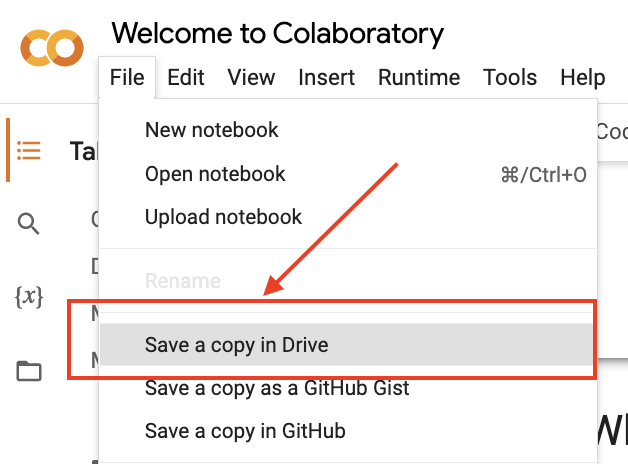

- Go to the copy and carry on to step 2

# Step 2 - Login to DataverseNL

1. Visit the Dataverse website https://dataverse.nl/ 
2. By clicking on **login** (up-right), you will see the following page.

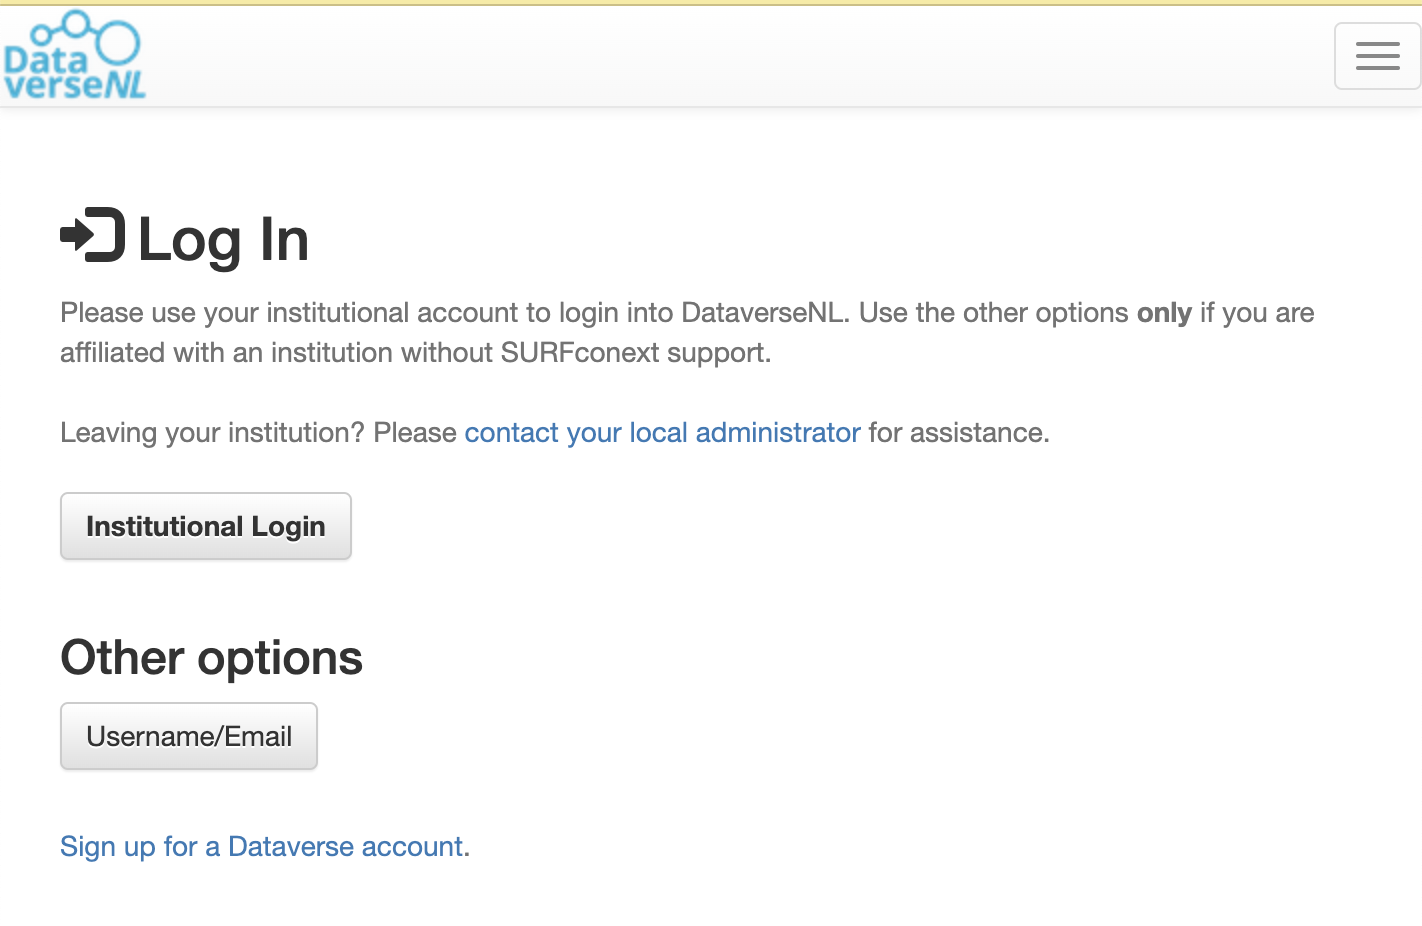

3. For all Dutch institutions it is possible to connect by Institutional login via SURF connect.
4. Log in to your account.


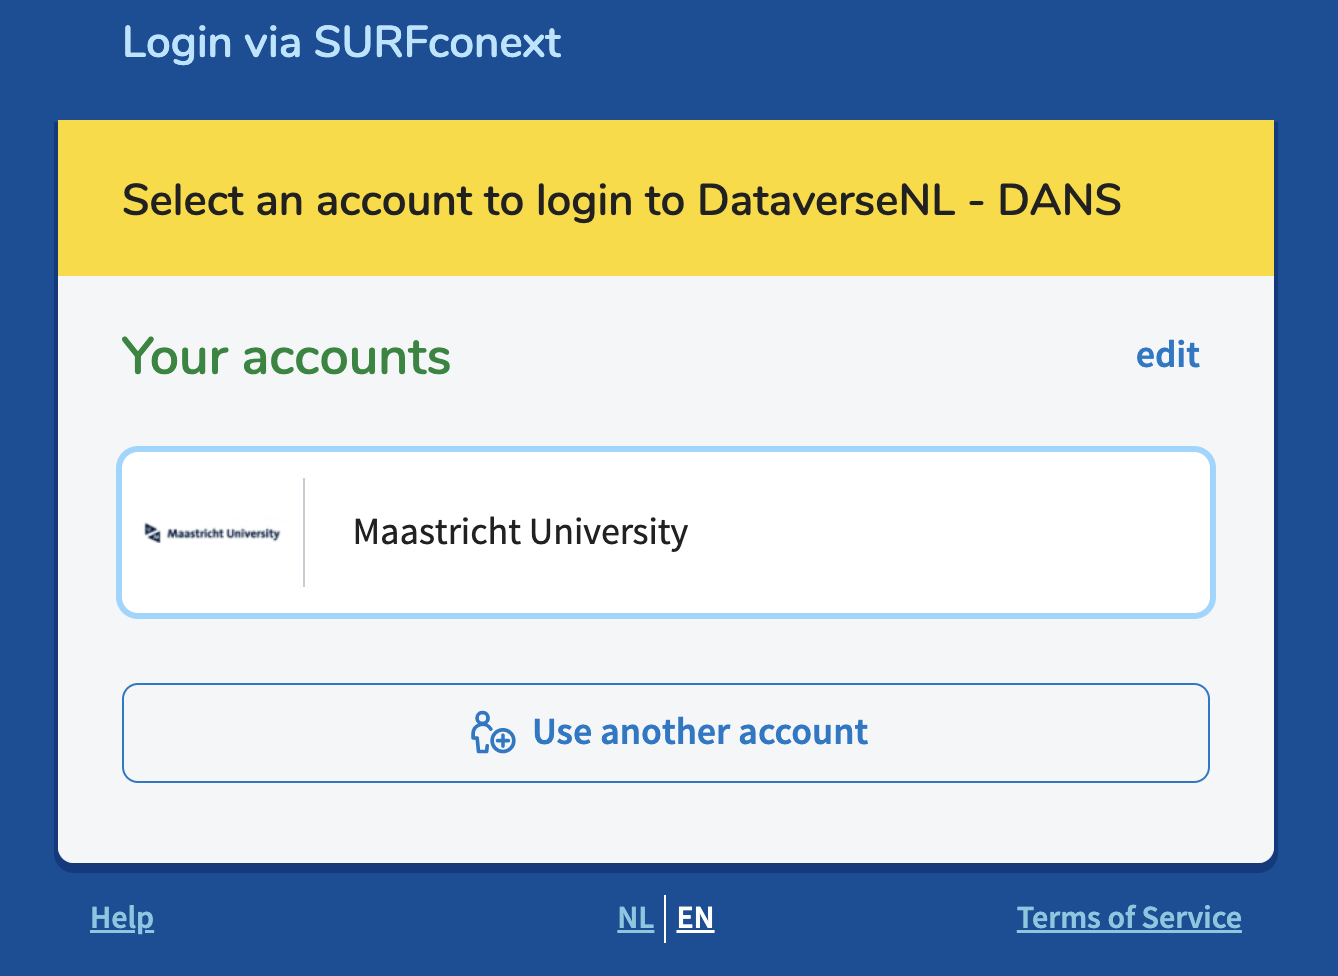

DataverseNL is Dutch implementation of Hardvard Dataverse maitained by [DANS](https://dans.knaw.nl/en/)


# Step 3 - Set up an API key

1. Once inside your account, you will be able to see your name on the top right-hand side. Click on it and select **API token**

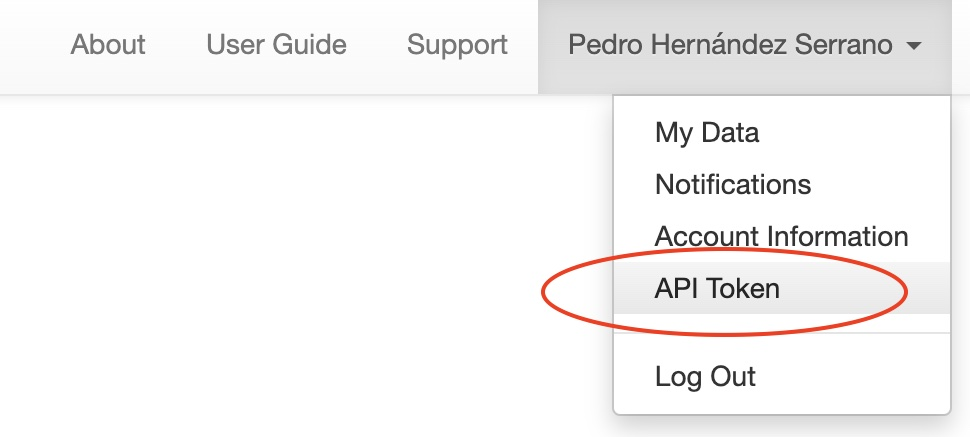

2. Click on the **API token** tab. (In case this is your first time, there will be a message `API Token for <user> has not been created`)
3. Click on **Create Token** 

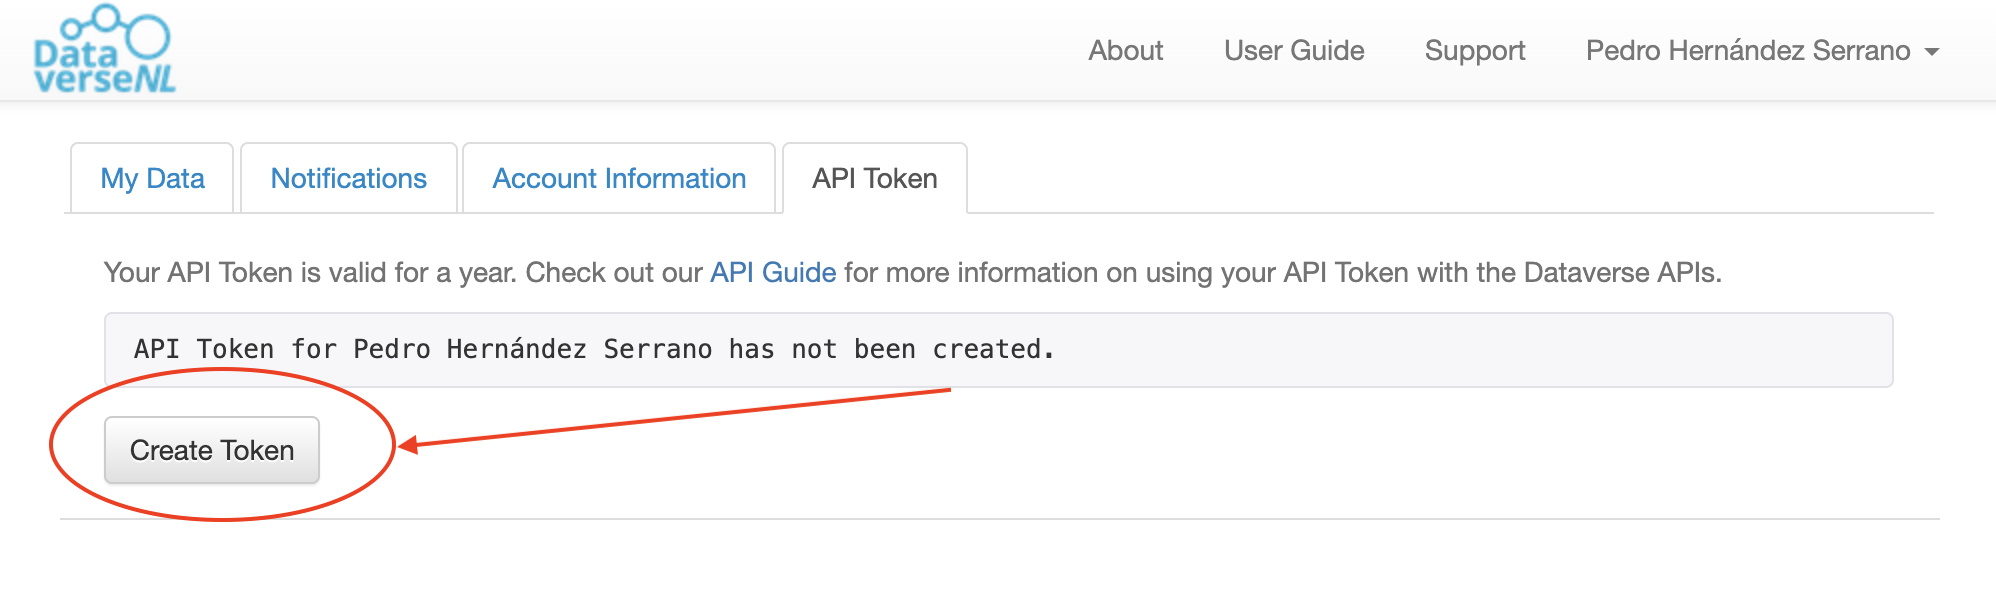

4. An alphanumerical token will be generated for you. Click on **Copy to Clipboard** to copy it.
5. Paste the **API token** in the following cell substituting the **XXXX (keep the quotation marks) `' '`**
Run the cell below: (click the ▶️ button)

In [ ]:
API_TOKEN = 'XXXX-XXXX-XXXX-XXXX-XXXX-XXXX'

# Step 4 - Allocate your DOI



1. Go back to the DataverseNL page and navigate to the dataverse where you want to put the data (e.g. Faculty of Science and Engineering)
2. Go to the dataset that you have previously created. For this to work you need a target dataset in dataverse. You create a dataset by clicking on create dataset button. To be able to create a dataset you need to create an account
3. Once you click on your dataset entry, go to the **Metadata** tab, the first entry is the data persistent identifier **DOI (Digital Object Identifier)**

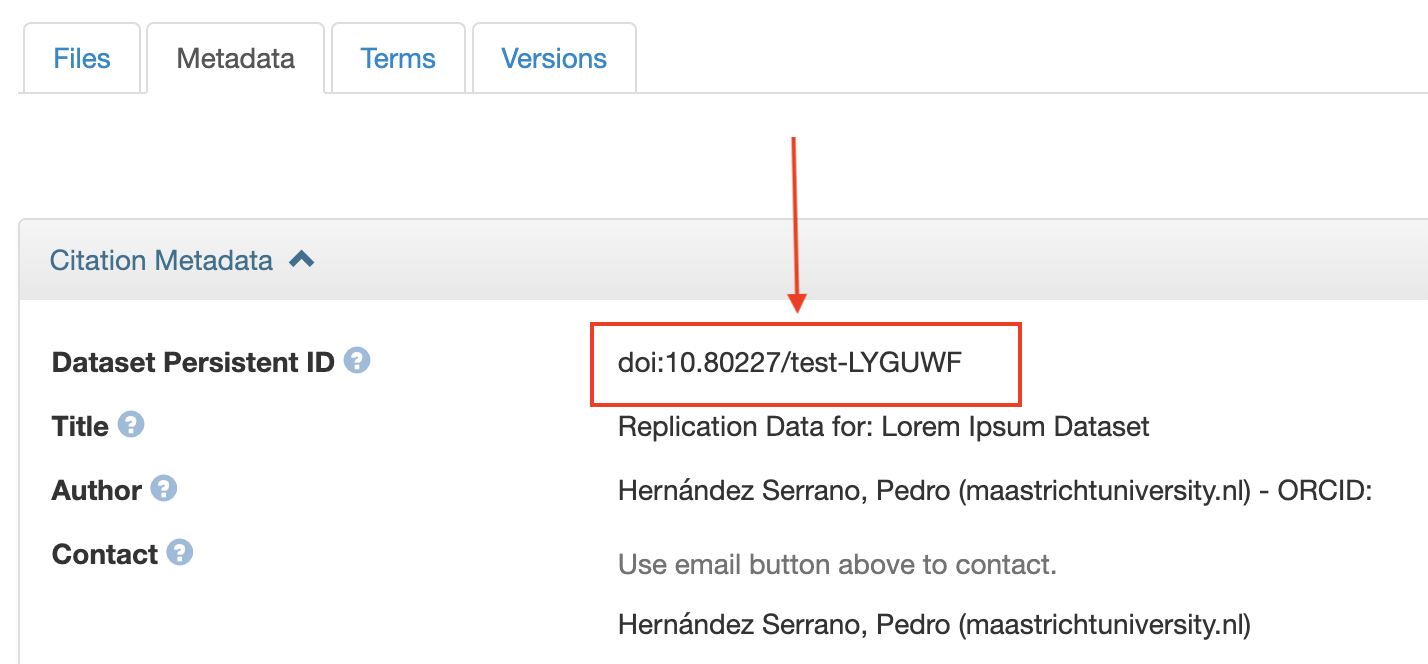


6. Copy this DOI and paste it into the cell below substituting **XXXX (keep the quotation marks) `' '`**

Run the cell below: (click the ▶️ button)

In [ ]:
DOI = 'doiXXXXXXXXXXXXXXXX'
BASE_URL = "https://dataverse.nl"

## Step 5 - Go to the Github page

In this step, visit the Github project you want to transfer a folder from. As an example, the project below was chosen.

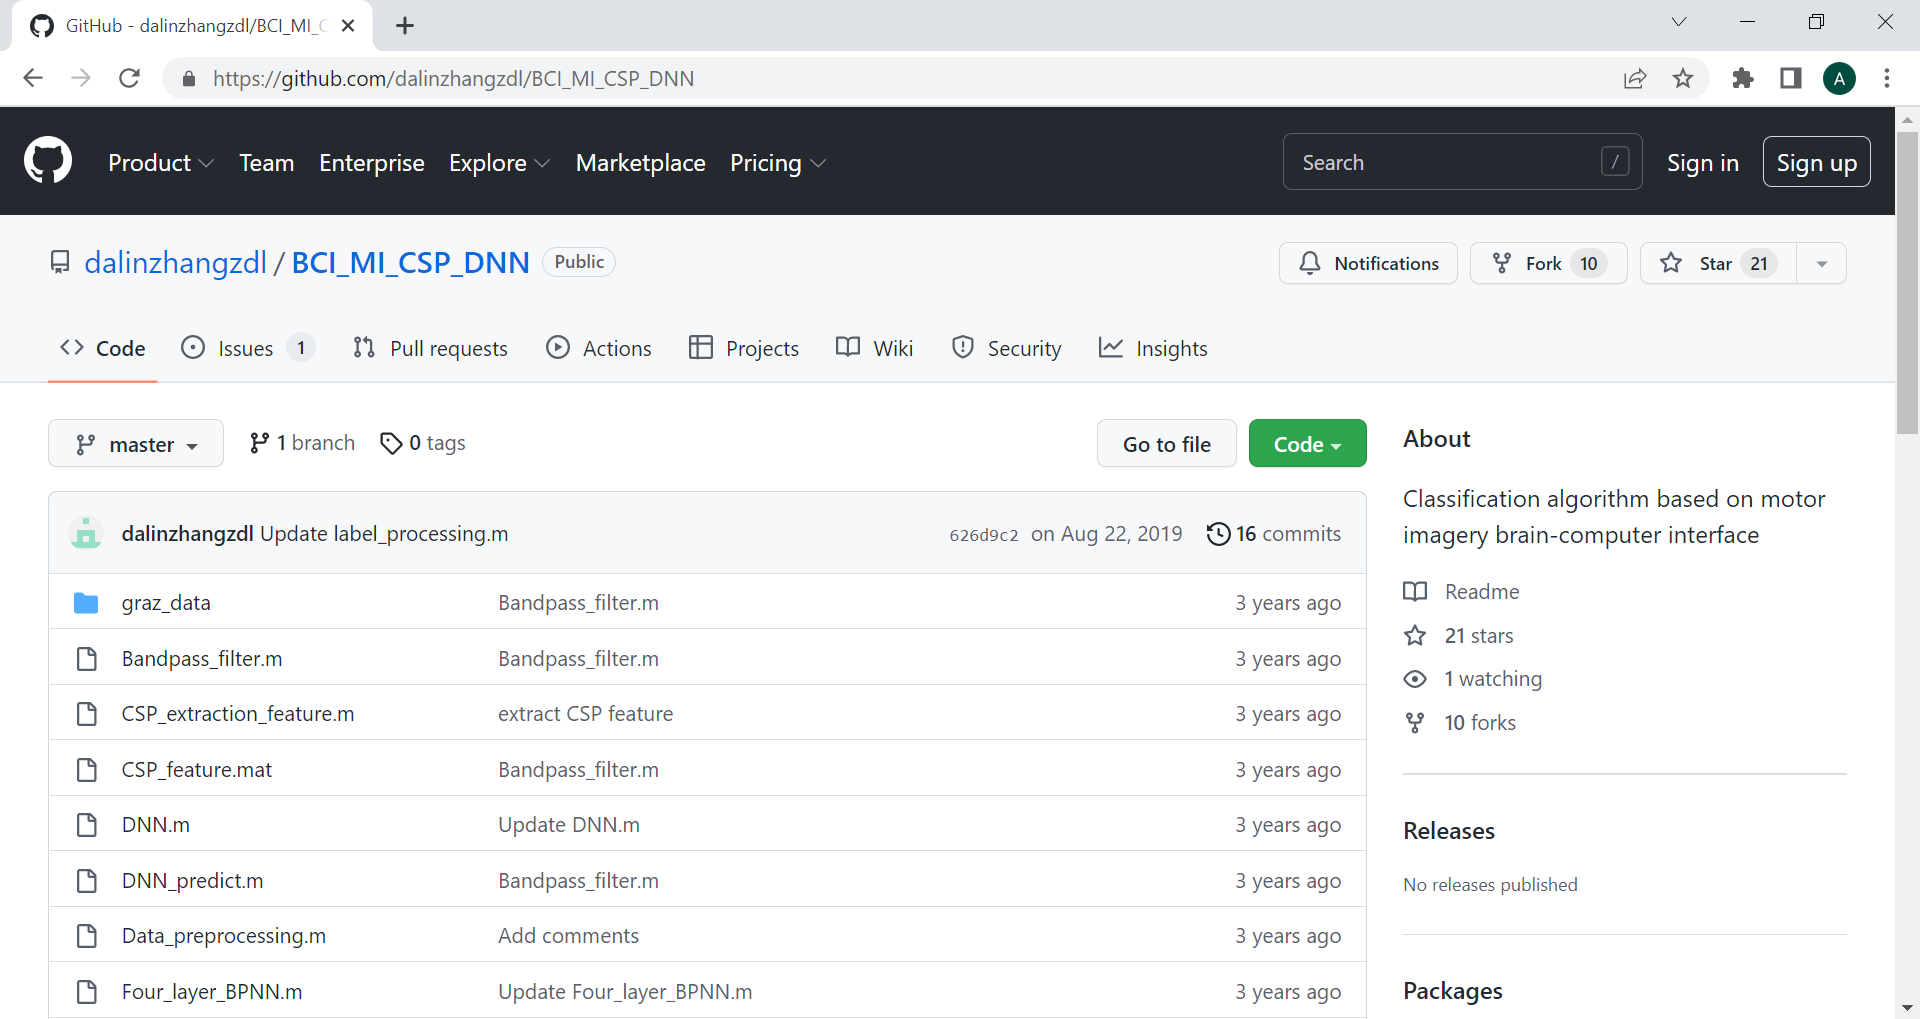

We simply go to the folder:

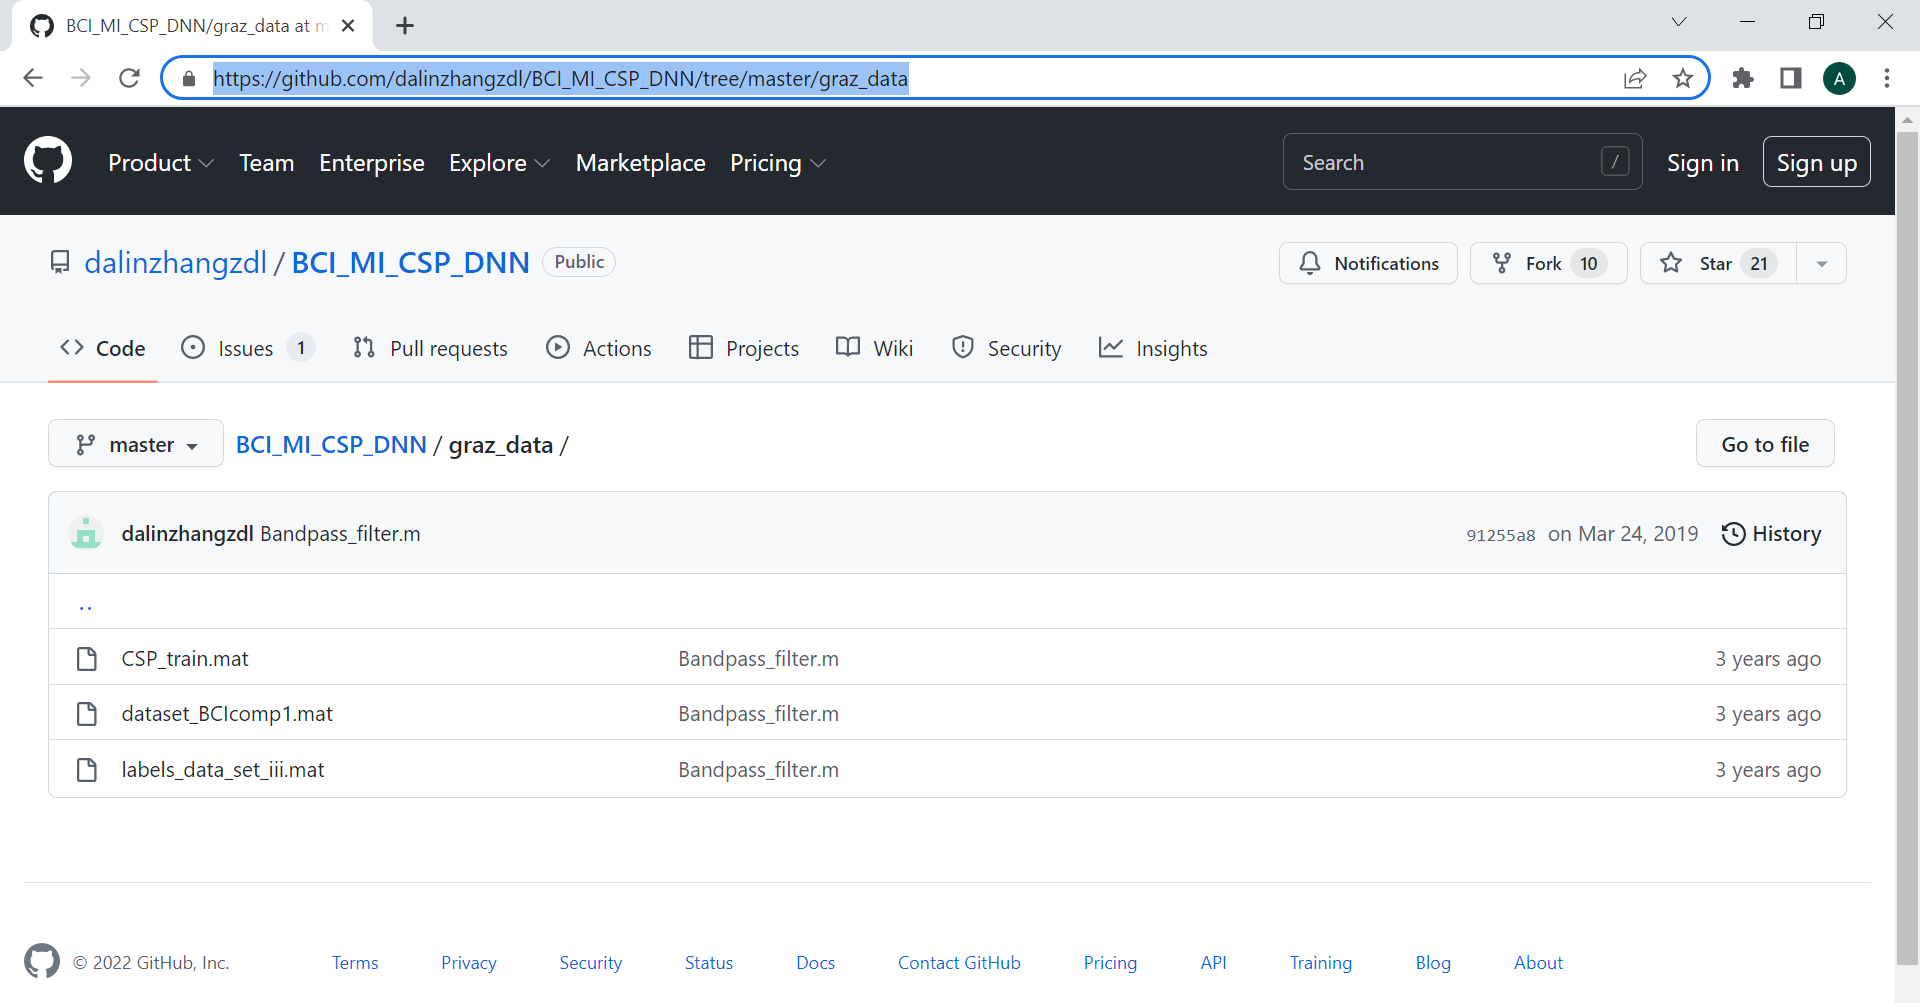

We can see the link is as follows:
https://github.com/dalinzhangzdl/BCI_MI_CSP_DNN/tree/master/graz_data

Run the cell below: (click the ▶️ button)

In [ ]:
url = "enter link here"

 #### run the cell below without any changes: (click the ▶️ button)
 

In [ ]:
import requests
import urllib.request
from bs4 import BeautifulSoup 
import zipfile
import sys
from io import BytesIO

def fix_url(url):
    fixed = url.split(".com/")[1]
    data = fixed.split("/")
    data.pop(2)
    url = "https://raw.githubusercontent.com"
    for datum in data:
        url = url + "/" + datum
    return url    

res = requests.get(url)    
soup = BeautifulSoup(res.text, 'html.parser')   
file = soup.find_all('a',class_="js-navigation-open")
files = []
for i in file:
    if '.' in i.text:
        if i.text != "\n.\u200a.\n":
            files.append(i.text)
            
            
headers = {
    'Content-Disposition': 'filename=data.zip',
    'Content-Type': 'application/zip',
    'Packaging': 'http://purl.org/net/sword/package/SimpleZip',
}

req = BASE_URL +  "/dvn/api/data-deposit/v1.1/swordv2/edit-media/study/" + DOI  
            
url_fix = fix_url(url)
zip_buffer = BytesIO()
with zipfile.ZipFile(zip_buffer, 'w',
                     compression=zipfile.ZIP_DEFLATED,
                     compresslevel=9) as zf:
    for file in files:
        file_name= "./"+ file
        url2 = url_fix + "/" + file
        webFile = urllib.request.urlopen(url2)
        file_data = BytesIO()
        file_data.write(webFile.read()) 
        zf.writestr(file,file_data.getvalue())
        webFile.close()
        




response = requests.post(req, headers=headers, data=zip_buffer.getvalue(), auth=(API_TOKEN, ''))

if response.status_code == 201:
  print("Successful")
else:
  print("Something went wrong") 


#Success! 🎉🎉
You have successfully transferred a folder from Github to DataverseNL.

Didn't go so smooth? Please feel free to contact or ask questions to: p.hernandezserrano@maastrichtuniversity.nl